In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from src.plotData import plotData
from src.cellData import cellData
from src.cellExtractOCV import cellExtractOCV
from src.cellSim import cellSim

## Create List of Tests Available From Dataset

In [3]:
pathname = (
    "datasets/lg-18650hg2/LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020/"
)
temp = "25degC/"
filenames = [
    filename
    for filename in os.listdir(pathname + temp)
    if filename.endswith(".csv")
]
d = pd.DataFrame(filenames)
d.to_csv("filenames.csv", header=None, index=False)
print(d)

                   0
0   549_C20DisCh.csv
1     549_Charge.csv
2   549_Dis_0p5C.csv
3     549_Dis_2C.csv
4       549_HPPC.csv
5     551_Cap_1C.csv
6    551_Charge1.csv
7    551_Charge2.csv
8    551_Charge3.csv
9    551_Charge4.csv
10   551_Charge5.csv
11   551_Charge6.csv
12   551_Charge7.csv
13   551_Charge8.csv
14     551_HWFET.csv
15      551_LA92.csv
16    551_Mixed1.csv
17    551_Mixed2.csv
18      551_UDDS.csv
19      551_US06.csv
20    552_Cap_1C.csv
21  552_Charge10.csv
22  552_Charge11.csv
23  552_Charge12.csv
24  552_Charge13.csv
25  552_Charge14.csv
26  552_Charge15.csv
27  552_Charge16.csv
28   552_Charge9.csv
29    552_Mixed3.csv
30    552_Mixed4.csv
31    552_Mixed5.csv
32    552_Mixed6.csv
33    552_Mixed7.csv
34    552_Mixed8.csv
35  552_PausCycl.csv


## Extract OCV-SOC Curve

extract data done from 25degC/549_C20DisCh.csv


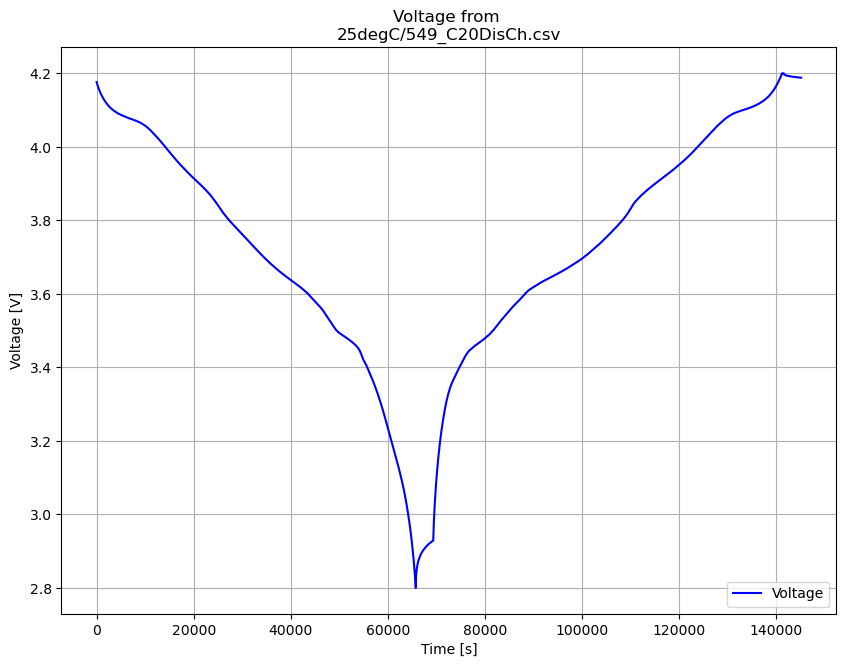

In [4]:
filename = temp + "549_C20DisCh.csv"
cellDataObj = cellData(filename, pathname)
plotDataObj = plotData()
cellDataObj.extractData()
plotDataObj.plotDataFromDataset(cellDataObj)

extract OCV done
compute OCV done
save OCV done


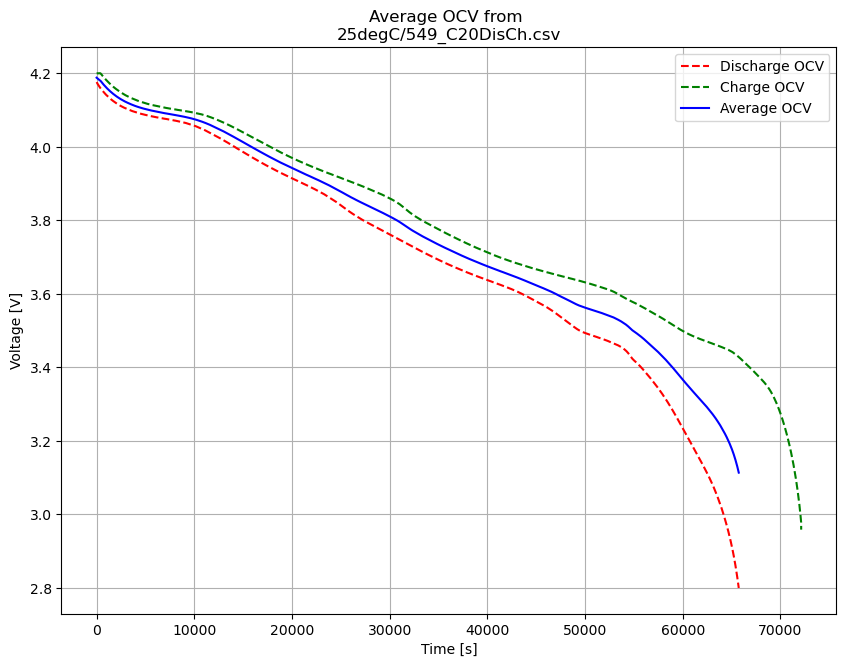

In [5]:
cellExtractOCVObj = cellExtractOCV(cellDataObj)
cellExtractOCVObj.runOCV()
plotDataObj.plotComputedOCV(cellExtractOCVObj)

## Train Model Parameters

extract data done from 25degC/551_Mixed1.csv
starting training of RC2 cell model
load OCV done
extract dynamic done
started parameter extraction via optimization
R0 =  0.019513579921562683 ohm
R1 =  0.015419130979942994 ohm
R2 =  0.5 ohm
C1 =  1395.9724779564363 farad
C2 =  84959.6454043148 farad
CRMSE =  20.01416826514894


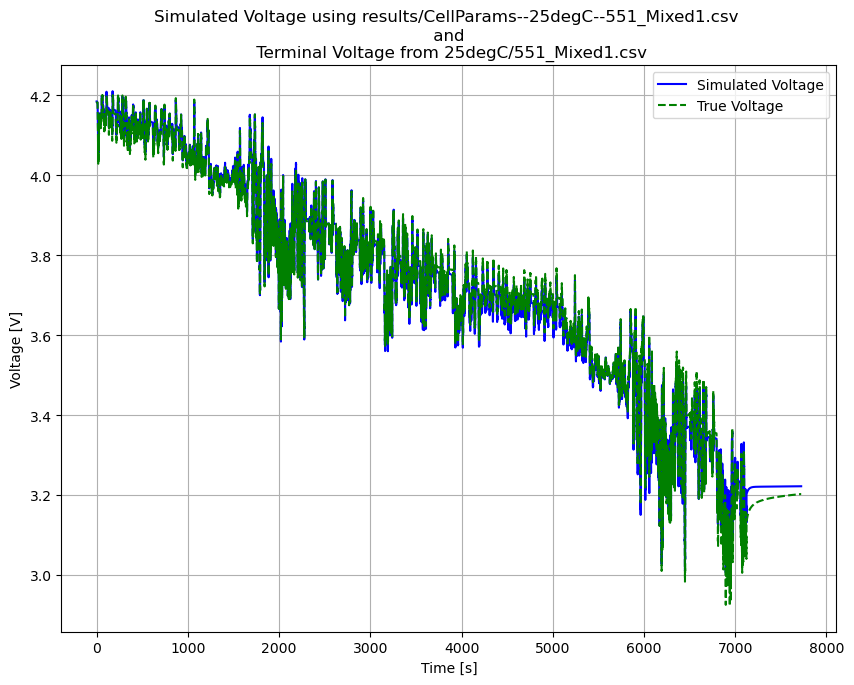

In [6]:
filename = temp + "551_Mixed1.csv"
cellDataObj = cellData(filename, pathname)
cellDataObj.extractData()

cellSimObj = cellSim(cellDataObj)
cellSimObj.runSimTrain()
plotDataObj.plotDynamic(cellSimObj)

## Validate Model Parameters

extract data done from 25degC/551_LA92.csv
starting validation of RC2 cell model
load OCV done
extract dynamic done
load CellParamsOpti done from CellParams--25degC--551_Mixed1.csv
R0 =  [0.01951358] ohm
R1 =  [0.01541913] ohm
R2 =  [0.5] ohm
C1 =  [1395.97247796] farad
C2 =  [84959.64540431] farad
CRMSE =  20.095525362647045


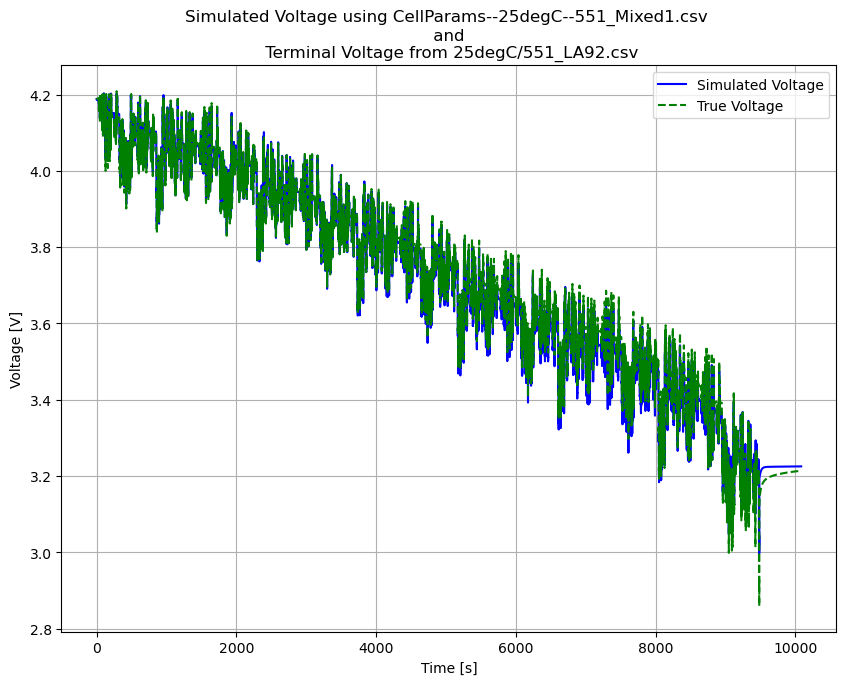

In [7]:
filename = temp + "551_LA92.csv"
cellDataObj = cellData(filename, pathname)
cellDataObj.extractData()

cellSimObj = cellSim(cellDataObj)
cellSimObj.runSimValidate()
plotDataObj.plotDynamic(cellSimObj)